# A. Data Loading


In [1]:
# importing Pandas
import pandas as pd

In [2]:
# Reading csv file
df = pd.read_csv('student-mat.csv', sep = ';' )

In [3]:
# To Display first 5 rows of Dataframe
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


# B. Data Exploration


In [4]:
# Missing values
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

In [5]:
# Data Types
df.dtypes

school        object
sex           object
age            int64
address       object
famsize       object
Pstatus       object
Medu           int64
Fedu           int64
Mjob          object
Fjob          object
reason        object
guardian      object
traveltime     int64
studytime      int64
failures       int64
schoolsup     object
famsup        object
paid          object
activities    object
nursery       object
higher        object
internet      object
romantic      object
famrel         int64
freetime       int64
goout          int64
Dalc           int64
Walc           int64
health         int64
absences       int64
G1             int64
G2             int64
G3             int64
dtype: object

In [6]:
# Shape of the Dataset
df.shape

(395, 33)

# C. Data Cleaning

In [7]:
# Drop Duplicates
df = df.drop_duplicates()

In [8]:
df = df.fillna(df.median(numeric_only = True))

# D. Data Analysis Questions


# 1. What is the average score in math (G3)?


In [9]:
average_g3 = df['G3'].mean()

In [10]:
print(f"Average G3 Score: {average_g3:.2f}")

Average G3 Score: 10.42


# 2. How many students scored above 15 in their final grade (G3)?

In [11]:
above_15 =  df[df['G3'] > 15] . shape[0]

In [12]:
print(f"Students with G3 > 15: {above_15} Students Scored above 15 in their final grade(G3)")

Students with G3 > 15: 40 Students Scored above 15 in their final grade(G3)


# 3. Is there a correlation between study time (study time) and the final grade (G3)?


In [13]:
correlation = df['studytime'].corr(df['G3'])

In [14]:
print(f"Correlation between study time and G3: {correlation:.2f}")

Correlation between study time and G3: 0.10


# 4. Which gender has a higher average final grade (G3)?

In [15]:
gender_avg = df.groupby('sex')['G3'].mean()

In [16]:
for gender, avg in gender_avg.items():
    print(f"{gender}: {avg:.2f}")

F: 9.97
M: 10.91


Male Gender has the higher average final grade

# E. Data Visualization

In [17]:
# importing matplotlib 
import matplotlib.pyplot as plt

In [18]:
# importing seaborn
import seaborn as sns

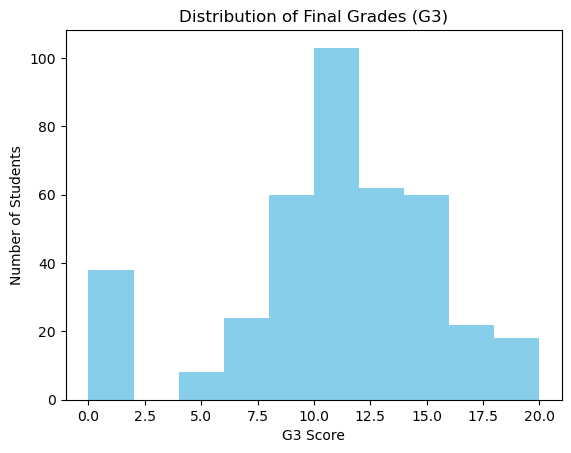

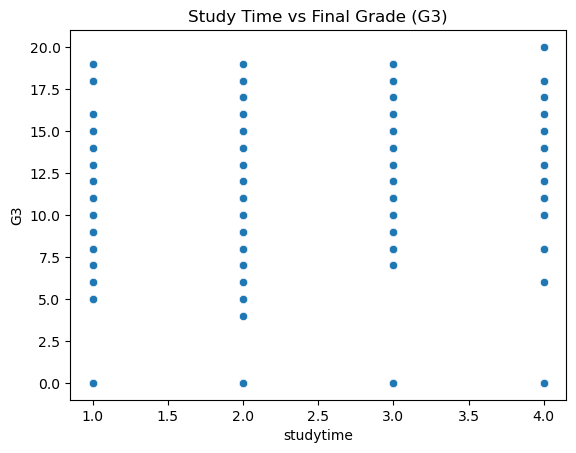

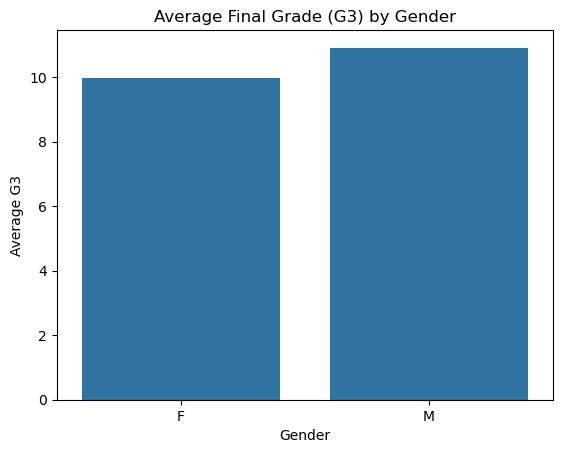

In [19]:
# Histogram of G3
plt.hist(df['G3'], bins=10, color='skyblue')
plt.title('Distribution of Final Grades (G3)')
plt.xlabel('G3 Score')
plt.ylabel('Number of Students')
plt.show()

# Scatter plot: studytime vs G3
sns.scatterplot(data=df, x='studytime', y='G3')
plt.title('Study Time vs Final Grade (G3)')
plt.show()

# Bar chart: average G3 by gender
sns.barplot(x=gender_avg.index, y=gender_avg.values)
plt.title('Average Final Grade (G3) by Gender')
plt.ylabel('Average G3')
plt.xlabel('Gender')
plt.show()